In [5]:
import pandas as pd
import bqplot
import json
import pandas as pd 
import re
import numpy as np
import random
from functools import reduce
import seaborn as sns
from ast import literal_eval
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from transformers import BertTokenizer

In [2]:
df = pd.read_csv('v1.25-2023-05-11-ror-data.csv',encoding='iso-8859-1')
df[:100]

,id,name,types,status,links,aliases,labels,acronyms,wikipedia_url,established,...,country.country_name,external_ids.GRID.preferred,external_ids.GRID.all,external_ids.ISNI.preferred,external_ids.ISNI.all,external_ids.FundRef.preferred,external_ids.FundRef.all,external_ids.Wikidata.preferred,external_ids.Wikidata.all,relationships
0,https://ror.org/019wvm592,Australian National University,Education,active,http://www.anu.edu.au/,NaN,NaN,ANU,http://en.wikipedia.org/wiki/Australian_Nation...,1946.0,...,Australia,grid.1001.0,grid.1001.0,NaN,0000 0001 2180 7477,5.011000e+11,501100000995;501100001151;100009020,NaN,Q127990,"Related: https://ror.org/041c7s516, https://ro..."
1,https://ror.org/02bfwt286,Monash University,Education,active,http://www.monash.edu/,NaN,NaN,NaN,http://en.wikipedia.org/wiki/Monash_University,1958.0,...,Australia,grid.1002.3,grid.1002.3,NaN,0000 0004 1936 7857,5.011000e+11,501100001779;501100001144;501100007917;5011000...,NaN,Q598841,"Related: https://ror.org/0484pjq71, https://ro..."
2,https://ror.org/00rqy9422,University of Queensland,Education,active,http://www.uq.edu.au/,NaN,NaN,UQ,http://en.wikipedia.org/wiki/University_of_Que...,1909.0,...,Australia,grid.1003.2,grid.1003.2,NaN,0000 0000 9320 7537,5.011000e+11,501100001794;501100008407;501100005268,NaN,Q866012,"Related: https://ror.org/010g47133, https://ro..."
3,https://ror.org/01sf06y89,Macquarie University,Education,active,http://mq.edu.au/,NaN,NaN,NaN,http://en.wikipedia.org/wiki/Macquarie_University,1964.0,...,Australia,grid.1004.5,grid.1004.5,NaN,0000 0001 2158 5405,NaN,501100001230,NaN,Q741082,Related: https://ror.org/0402tt118; Child: htt...
4,https://ror.org/01kj2bm70,Newcastle University,Education,active,http://www.ncl.ac.uk/,University of Newcastle upon Tyne,NaN,NaN,http://en.wikipedia.org/wiki/Newcastle_University,1834.0,...,United Kingdom,grid.1006.7,grid.1006.7,NaN,0000 0001 0462 7212,NaN,501100008406;501100000774,NaN,Q837164,"Related: https://ror.org/00cdwy346, https://ro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,https://ror.org/02edavb98,Agenzia Regionale Prevenzione e Ambiente della...,Government,active,http://www.arpa.emr.it/dettaglio_generale.asp?...,NaN,en: Regional Agency for Environmental Protecti...,ARPA,NaN,1995.0,...,Italy,grid.4947.e,grid.4947.e,NaN,0000 0004 1760 8629,NaN,NaN,NaN,NaN,NaN
96,https://ror.org/05bpbnx46,Copenhagen University Hospital,Healthcare,active,https://universitetshospital.ku.dk/,NaN,da: KÃ¸benhavns Universitetshospital,KUH,https://en.wikipedia.org/wiki/Copenhagen_Unive...,1757.0,...,Denmark,grid.4973.9,grid.4973.9,NaN,0000 0004 0646 7373,NaN,501100005111,NaN,Q5168500,Related: https://ror.org/035b05819; Child: htt...
97,https://ror.org/01j5n9f07,Institute for Atomic Energy Research,Facility,active,http://www.aeki.kfki.hu/?lang=en,Atomic Energy Research Institute,hu: Atomenergia KutatÃ³intÃ©zet,AEKI; AERI,NaN,1950.0,...,Hungary,grid.4987.2,grid.4987.2,NaN,NaN,NaN,NaN,NaN,NaN,Parent: https://ror.org/05wswj918
98,https://ror.org/03613d656,Brno University of Technology,Education,active,http://www.vutbr.cz/en/,VysokÃ© UÄenÃ­ TechnickÃ© v BrnÄ,cs: VysokÃ© uÄenÃ­ technickÃ© v BrnÄ,BUT; VUT,http://en.wikipedia.org/wiki/Brno_University_o...,1899.0,...,Czechia,grid.4994.0,grid.4994.0,NaN,0000 0001 0118 0988,NaN,501100004585,NaN,Q1122171,NaN


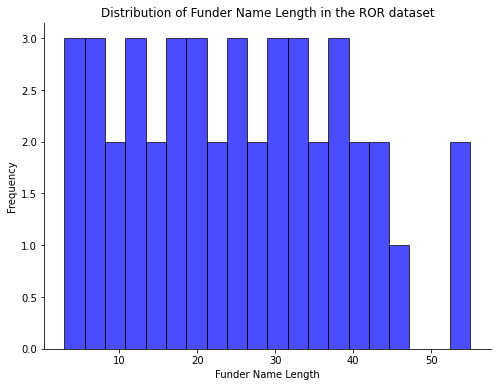

In [19]:
### the bar chart of the distribution of tokenized length of funder names
### the length of the funder names were calculated through BERT model using vectorized space
max_length = float('-inf')
min_length = float('inf')
length_distribution = {}
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('white') 

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

for index, row in df.iterrows():
    column_value = row['name']
    inputs = tokenizer(column_value, return_tensors="pt")
    length = len(inputs["input_ids"][0])
    
    if length > max_length:
        max_length = length
                
    if length < min_length:
        min_length = length
    
    if length in length_distribution:
        length_distribution[length] += 1
    
    else:
        length_distribution[length] = 1


lengths = list(length_distribution.keys())
counts = list(length_distribution.values())

plt.hist(lengths, bins=20, edgecolor='k', alpha=0.7, color='blue')
plt.xlabel('Funder Name Length')
plt.ylabel('Frequency')
plt.title('Distribution of Funder Name Length in the ROR dataset')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

plt.show()

In [10]:
unique_count = df['status'].nunique()
print(unique_count)

3


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


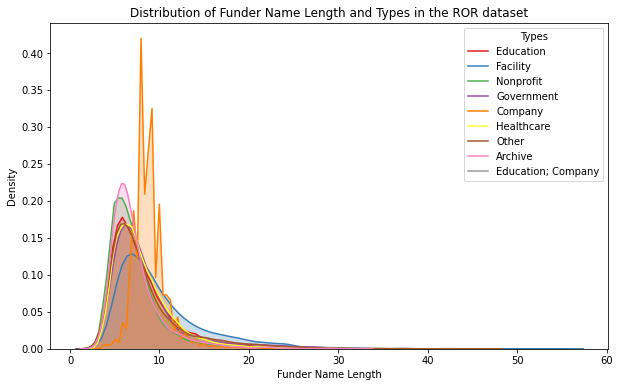

In [8]:
"""the density plot of types based on the length of Funder Names
   There are 9 funder types in this dataset
   For each length, we count the types of funder name and calculate the density of types for each length
"""

max_length = float('-inf')
min_length = float('inf')
length_distribution = {'length': [], 'types': []}

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

for index, row in df.iterrows():
    column_value = row['name']
    inputs = tokenizer(column_value, return_tensors="pt")
    length = len(inputs["input_ids"][0])
    
    if length > max_length:
        max_length = length
                
    if length < min_length:
        min_length = length
    
    length_distribution['length'].append(length)
    length_distribution['types'].append(row['types'])

# Create a DataFrame from the dictionary
df_distribution = pd.DataFrame(length_distribution)

palette = sns.color_palette("Set1", n_colors=9) 

plt.figure(figsize=(10, 6))
for category, color in zip(df_distribution['types'].unique(), palette):
    subset = df_distribution[df_distribution['types'] == category]
    sns.distplot(subset['length'], hist=False, kde=True, kde_kws={'shade': True}, label=category, color=color)

plt.xlabel('Funder Name Length')
plt.ylabel('Density')
plt.title('Distribution of Funder Name Length and Types in the ROR dataset')
plt.legend(title='Types', loc='upper right')

plt.show()

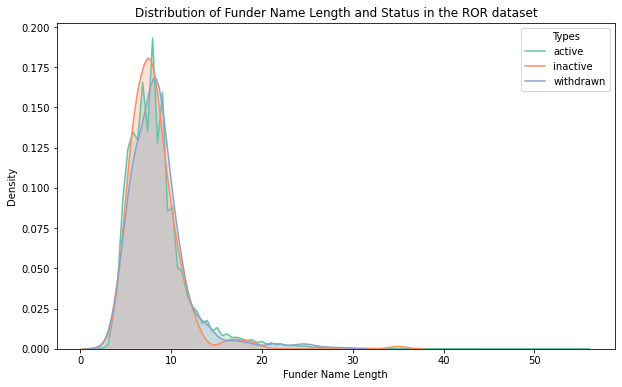

In [12]:
"""the distribution plot of status based on the length of Funder Names
   There are 3 status in this dataset
   For each length, we count the density of status for each funder name length
"""

max_length = float('-inf')
min_length = float('inf')
length_distribution = {'length': [], 'status': []}

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

for index, row in df.iterrows():
    column_value = row['name']
    inputs = tokenizer(column_value, return_tensors="pt")
    length = len(inputs["input_ids"][0])
    
    if length > max_length:
        max_length = length
                
    if length < min_length:
        min_length = length
    
    length_distribution['length'].append(length)
    length_distribution['status'].append(row['status'])

# Create a DataFrame from the dictionary
df_distribution = pd.DataFrame(length_distribution)

palette = sns.color_palette("Set2", n_colors=3) 

plt.figure(figsize=(10, 6))
for category, color in zip(df_distribution['status'].unique(), palette):
    subset = df_distribution[df_distribution['status'] == category]
    sns.distplot(subset['length'], hist=False, kde=True, kde_kws={'shade': True}, label=category, color=color)

plt.xlabel('Funder Name Length')
plt.ylabel('Density')
plt.title('Distribution of Funder Name Length and Status in the ROR dataset')
plt.legend(title='Types', loc='upper right')

plt.show()